In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
startups = pd.read_csv('D:/execlr/Assignments/Assigmnent 5/50_Startups.csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df = startups.rename({'R&D Spend' : 'RD_Spend','Marketing Spend' : 'Marketing_Spend'},axis=1)
df.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,RD_Spend,Administration,Marketing_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df[df.duplicated()]

,RD_Spend,Administration,Marketing_Spend,State,Profit


<AxesSubplot:>

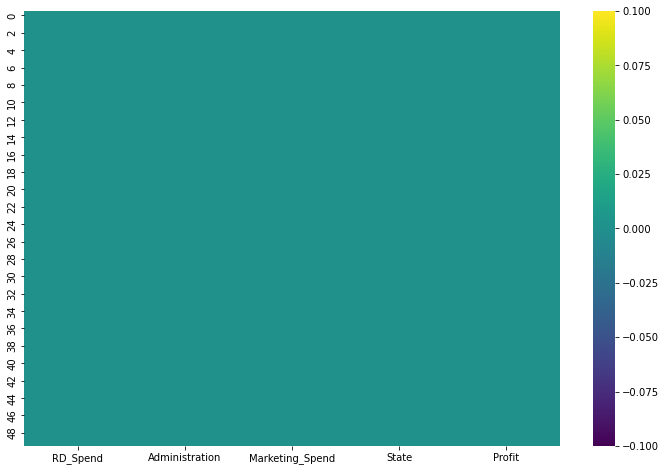

In [7]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis')

In [8]:
df.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


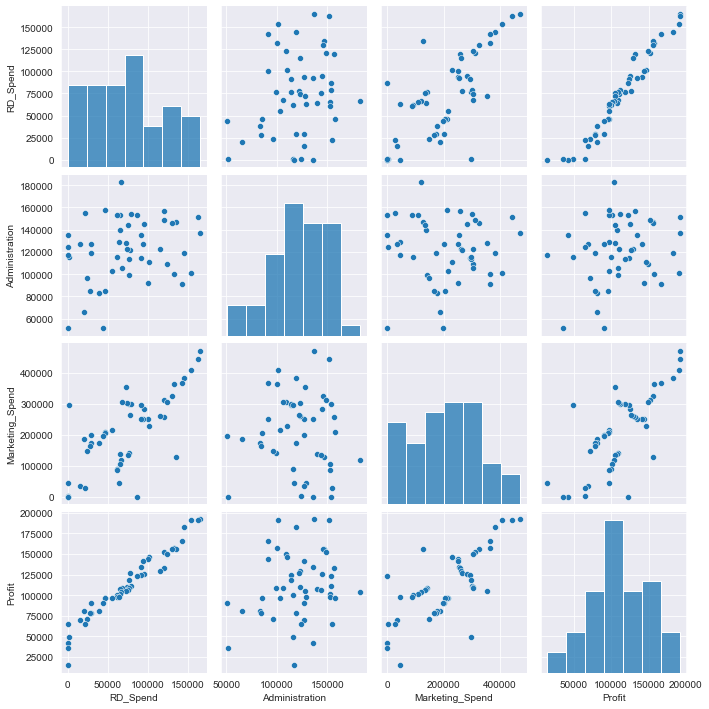

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [10]:
model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df).fit()
model

In [11]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        12:58:26   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
model.fittedvalues

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [13]:
model.params

Intercept          50122.192990
RD_Spend               0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [14]:
print(model.tvalues)

Intercept           7.626218
RD_Spend           17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64


In [15]:
print(np.round(model.pvalues,))

Intercept          0.0
RD_Spend           0.0
Administration     1.0
Marketing_Spend    0.0
dtype: float64


In [16]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [17]:
# the p values for RD_Spend and Marketing_Spend is greater than 0.5.
# we built the slr and mlr model and calculated p values for that.

model1=smf.ols('Profit~RD_Spend',data=df).fit()
print(model1)
print(model1.tvalues,'\n',model1.pvalues)

Intercept    19.320288
RD_Spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_Spend     3.500322e-32
dtype: float64


In [18]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        12:58:26   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_Spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model2=smf.ols('Profit~Marketing_Spend',data=df).fit()
print(model2)
print(model2.tvalues,'\n',model2.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [20]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        12:58:26   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept            6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing_Spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
model3=smf.ols('Profit~RD_Spend+Marketing_Spend',data=df).fit()
print(model3)
print(model3.tvalues,'\n',model3.pvalues)

Intercept          17.463582
RD_Spend           19.265555
Marketing_Spend     1.927052
dtype: float64 
 Intercept          3.504062e-22
RD_Spend           6.040433e-24
Marketing_Spend    6.003040e-02
dtype: float64


In [22]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sat, 23 Jul 2022   Prob (F-statistic):           2.16e-31
Time:                        12:58:26   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RD_Spend            0.7966      0.041     19.266      0.000       0.713       0.880
Marketing_Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model_Validation (collinearity check)

In [23]:
rsq_rd=smf.ols('RD_Spend~Administration+Marketing_Spend',data=df).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_adms=smf.ols('Administration~RD_Spend+Marketing_Spend',data=df).fit().rsquared
vif_adms=1/(1-rsq_adms)
rsq_ms=smf.ols('Marketing_Spend~Administration+RD_Spend',data=df).fit().rsquared
vif_ms=1/(1-rsq_ms)

data1={'Variables':['RD_Spend','Administration','Marketing_Spend'],'Vif':[vif_rd,vif_adms,vif_ms]}
Vif_df=pd.DataFrame(data1)
Vif_df

,Variables,Vif
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


## Check For Residuals

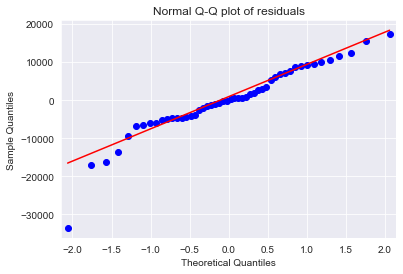

In [24]:
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

<AxesSubplot:xlabel='RD_Spend'>

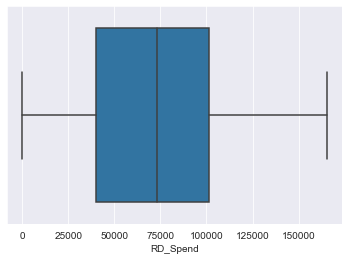

In [25]:
list(np.where(model.resid<-30000))
sns.boxplot(df['RD_Spend'])

<AxesSubplot:xlabel='RD_Spend', ylabel='Count'>

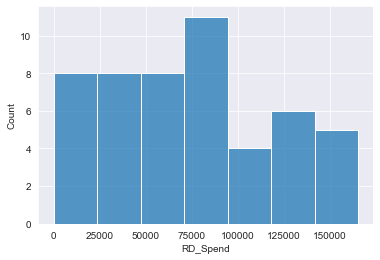

In [26]:
sns.histplot(df['RD_Spend'])

<AxesSubplot:xlabel='RD_Spend', ylabel='Density'>

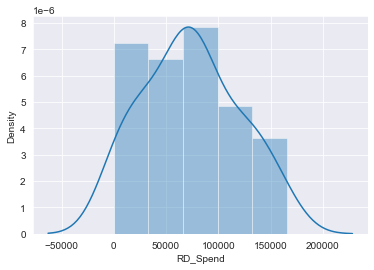

In [27]:
sns.distplot(df['RD_Spend'])

## Residuals plot for Homoscedasticity

In [28]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

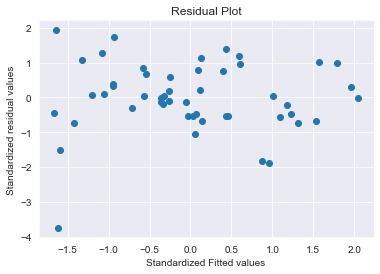

In [29]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residuals VS Regressor

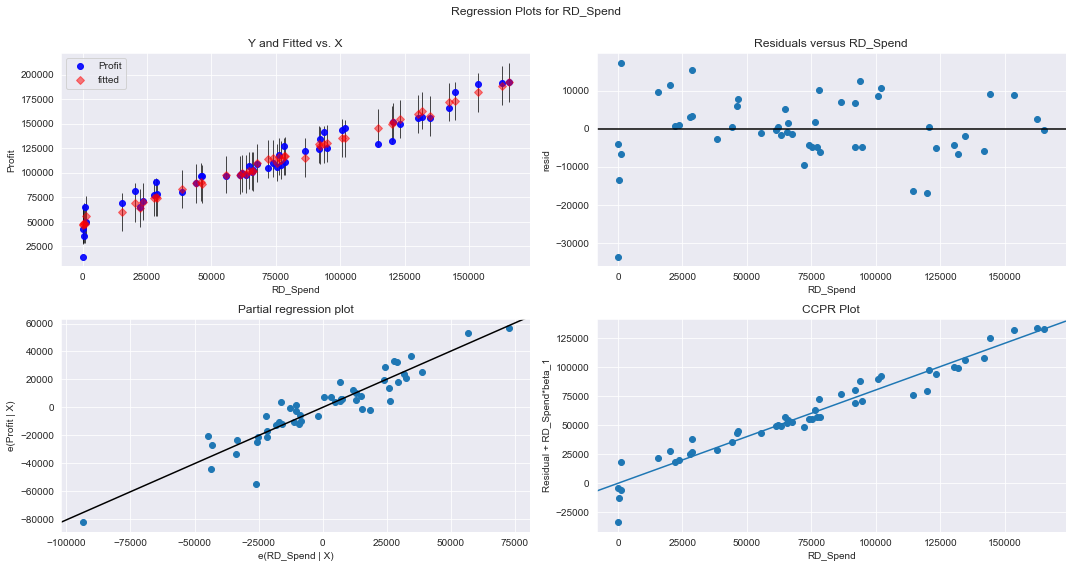

In [30]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

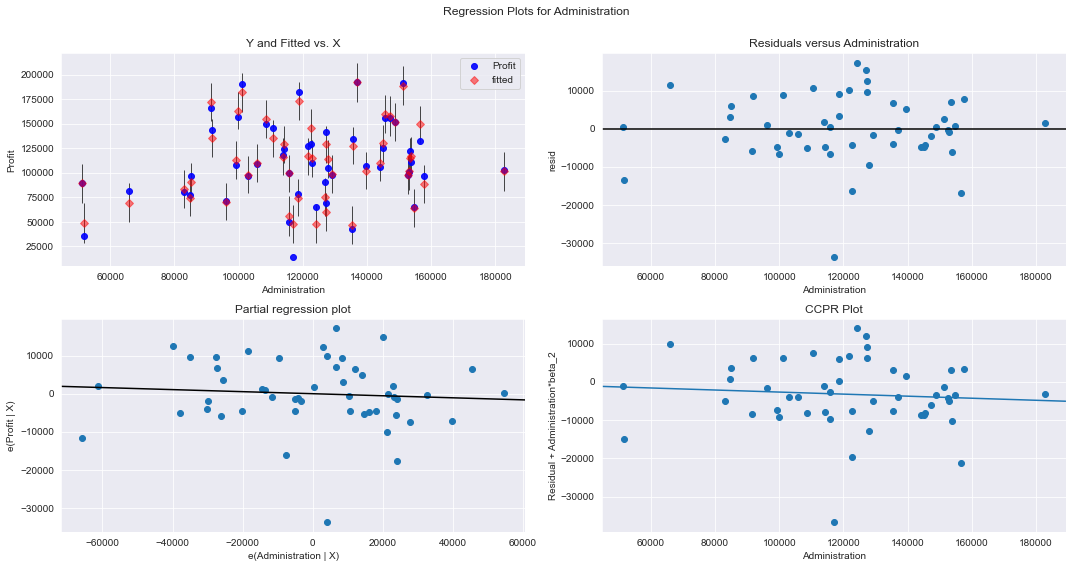

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

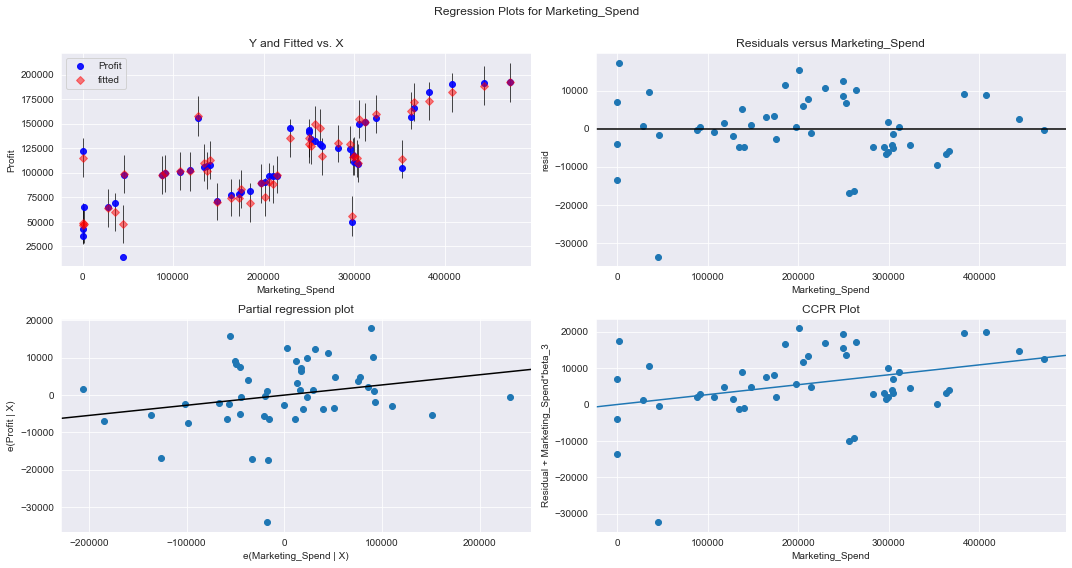

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

# Cooks Distance

In [33]:
df.shape

(50, 5)

In [34]:
model_influence = model.get_influence()
(c, _)= model_influence.cooks_distance

In [35]:
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

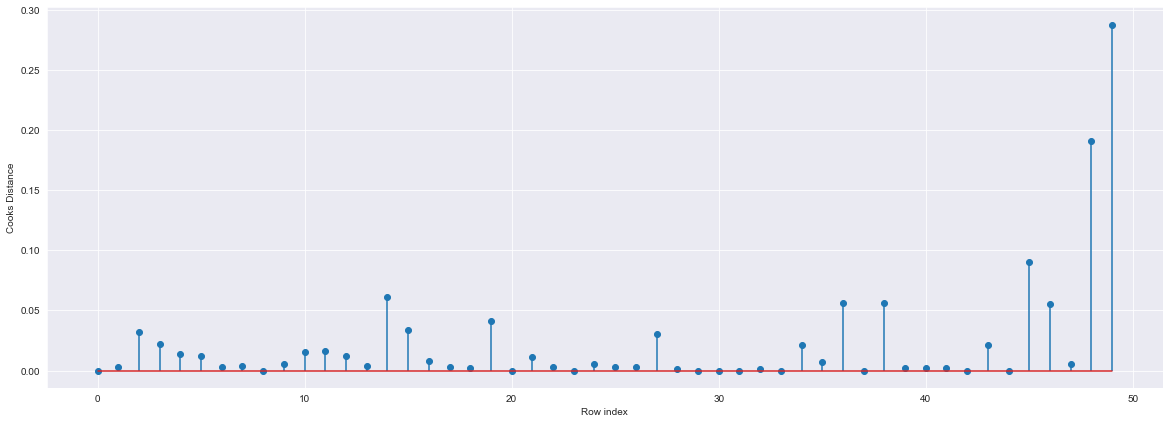

In [36]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
#index and values= of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

### High Influence Point

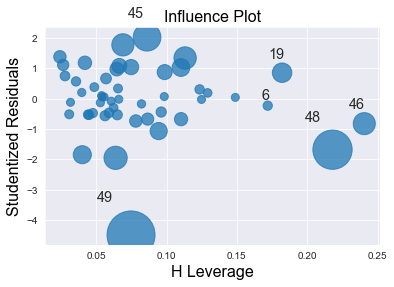

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [39]:
# Leverage Cuttoff Value = 3*(k+1)/n ;
# k = no.of features/columns & n = no. of datapoints
k=df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [40]:
df[df.index.isin([49])]

,RD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [41]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df2.head(10)

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## Model Deletion Diagnostics and Final Model

In [42]:
while np.max(c)>0.5 :
    model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RD_Spend+Administration+Marketing_Spend",data=df2).fit()
    final_model.rsquared , final_model.aic
    print("Thus Model Accuracy is Improved to",final_model.rsquared)

Thus Model Accuracy is Improved to 0.9613162435129847


## Model Predictions

In [45]:
# New Data for Prediction is
new_data = pd.DataFrame({'RD_Spend':70000,'Administration':90000,'Marketing_Spend': 140000},index=[0])
new_data

,RD_Spend,Administration,Marketing_Spend
0,70000,90000,140000


In [48]:
# Prediction of new data
print('Profit preditcated by Old Model',model.predict(new_data))
print('Profit preditcated by Final Model',final_model.predict(new_data))

Profit preditcated by Old Model 0    107920.738401
dtype: float64
Profit preditcated by Final Model 0    108727.154753
dtype: float64


In [49]:
df2['Predited Profit'] = pd.DataFrame(final_model.predict(df2))

In [51]:
df2

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [52]:
model.rsquared

0.9507459940683246

In [53]:
final_model.rsquared

0.9613162435129847

In [55]:
Predi= final_model.predict(df2)
Predi

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64